In [1]:
# torch library and sublibraries
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

# plotting libraries
import matplotlib
import matplotlib.pyplot as plt 
# numpy (math) libary
import numpy as np

In [2]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 8, 128, 8

loops = int(256*N)

logy = True # prints errors in semi-log axis

base_lr = 1e-4
sigm_lr = 1e-2
best_lr = 1e-2

In [3]:
# Create random Tensors to hold inputs and outputs, and wrap them in Variables
x = Variable(torch.rand(N, D_in))
y = Variable(torch.rand(N, D_out), requires_grad=False)

# (re-)initialize data dictionary
err = {}

In [4]:
# define baseline network with relu (clamp)
class Baseline(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(Baseline, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        # sum (linear1) and then relu (clamp)
        h1     = self.linear1(x).clamp(min=0)
        # sum (linear2) and then relu (clamp)
        y_pred = self.linear2(h1).clamp(min=0)
        return y_pred # output = y_pred(icted)

# Construct our model by instantiating the class defined above
basemodel = Baseline(D_in, H, D_out)

# initialize dictionary item
err[0] = (base_lr,[])

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(basemodel.parameters(), lr=err[0][0])

for t in range(loops):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = basemodel(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    err[0][1].append(loss.data[0])
    if (t+1)%(loops//20) == 0:
        print(t+1, loss.data[0])

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

819 106.94807434082031
1638 105.56964874267578
2457 104.71053314208984
3276 103.88919067382812
4095 103.17236328125
4914 102.49363708496094
5733 101.86314392089844
6552 101.27389526367188
7371 100.7151107788086
8190 100.19600677490234
9009 99.71507263183594
9828 99.27679443359375
10647 98.86670684814453
11466 98.48697662353516
12285 98.13397216796875
13104 97.80411529541016
13923 79.08502960205078
14742 78.45992279052734
15561 61.32916259765625
16380 60.27898025512695


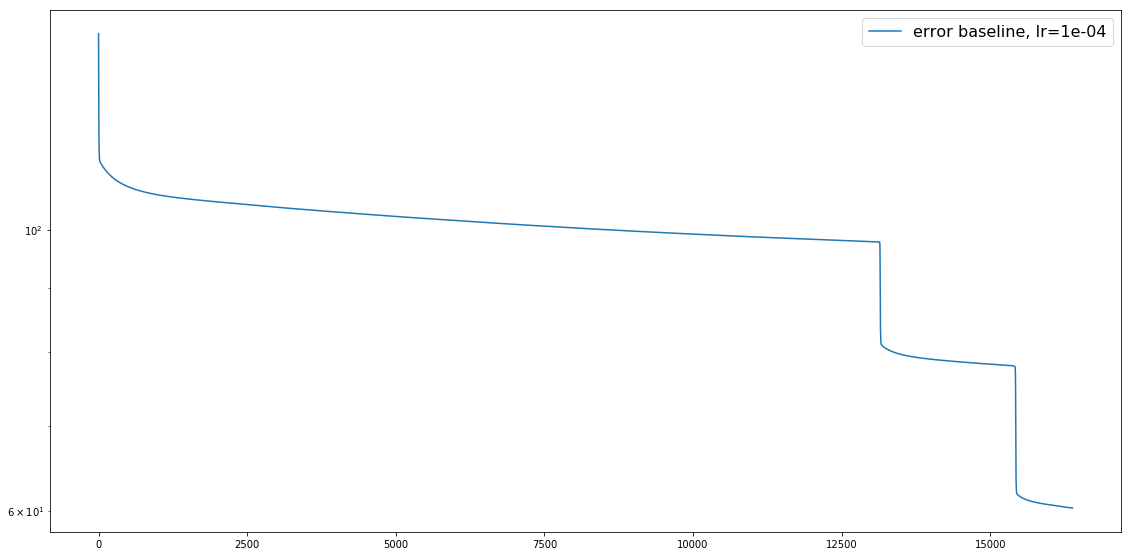

In [5]:
fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

if logy:
    for ii, ee in err.items():
        ax1.semilogy(ee[1][:], label='error baseline, lr=%1.0e'%ee[0])
else:
    for ii, ee in err.items():
        ax1.plot(ee[1][:], label='error baseline, lr=%1.0e'%ee[0])

#ax1.set_xlabel('', fontsize = 16)
#ax1.set_ylabel('', fontsize = 16)
legend = ax1.legend(loc='best', fontsize=16)

plt.show()
plt.close()

In [6]:
# define different network with sigmoid
class BaseSigmoid(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(BaseSigmoid, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        # sum (linear1) and then sigmoid (F.sigmoid)
        h1     = F.sigmoid(self.linear1(x))
        # sum (linear2) and then sigmoid (F.sigmoid)
        y_pred = F.sigmoid(self.linear2(h1))
        return y_pred # output = y_pred(icted)

# Construct our model by instantiating the class defined above
sigmodel = BaseSigmoid(D_in, H, D_out)

# initialize dictionary item
err[1] = (sigm_lr,[])

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(sigmodel.parameters(), lr=err[1][0])

for t in range(loops):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = sigmodel(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    err[1][1].append(loss.data[0])
    if (t+1)%(loops//20) == 0:
        print(t+1, loss.data[0])

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

819 32.978397369384766
1638 32.751441955566406
2457 32.59590148925781
3276 32.268760681152344
4095 31.433452606201172
4914 30.005348205566406
5733 28.642894744873047
6552 27.059499740600586
7371 25.111957550048828
8190 23.00889778137207
9009 20.97475814819336
9828 19.172470092773438
10647 17.580411911010742
11466 16.124279022216797
12285 14.77741527557373
13104 13.541996955871582
13923 12.424436569213867
14742 11.422309875488281
15561 10.5144681930542
16380 9.671622276306152


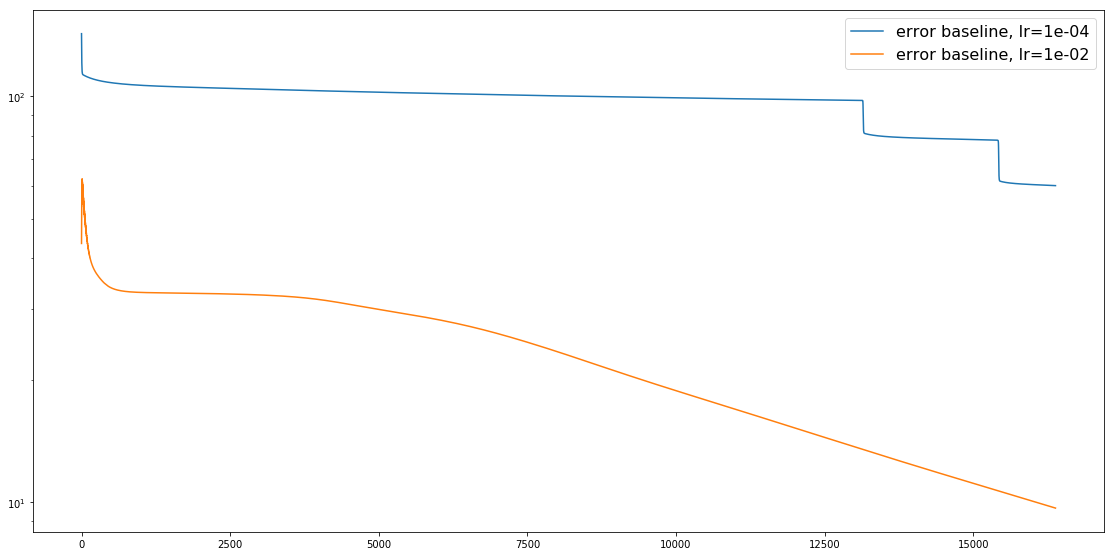

In [7]:
fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

if logy:
    for ii, ee in err.items():
        ax1.semilogy(ee[1][:], label='error baseline, lr=%1.0e'%ee[0])
else:
    for ii, ee in err.items():
        ax1.plot(ee[1][:], label='error baseline, lr=%1.0e'%ee[0])

#ax1.set_xlabel('', fontsize = 16)
#ax1.set_ylabel('', fontsize = 16)
legend = ax1.legend(loc='best', fontsize=16)

plt.show()
plt.close()

In [20]:
class BestSigmoid(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(BestSigmoid, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        # parameters
        p = [ 689.651615, 0.433819208, 1.31042204, -0.975437185, -0.518489780, 0.403015568, 0.502495627]
        
        #h1      = p[1]*F.sigmoid(p[0]*(self.linear1(x)-p[5]))#
        #h1     += p[2]*self.linear1(x).clamp(min=0)#
        #h1     += p[3]*self.linear1(x).clamp(min=p[5])#
        #h1     += p[4]*self.linear1(x).clamp(min=p[6])#
        
        h1      = p[1]*F.sigmoid(p[0]*(self.linear1(x)-p[5]))+p[2]*self.linear1(x).clamp(min=0)+p[3]*self.linear1(x).clamp(min=p[5])+p[4]*self.linear1(x).clamp(min=p[6])
        
        #p[0], p[1], p[2], p[3], p[4], p[5], p[6]
        #  a,    b,    c,    d,    g,   x0,   x1)
        #b*sigmoid(a*(arg-x0))+c*relu(arg)+d*relu(arg-x0)+g*relu(arg-x1)
                                
        #y_pred  = p[1]*F.sigmoid(p[0]*(self.linear2(h1)-p[5]))#
        #y_pred += p[2]*self.linear2(h1).clamp(min=0)#
        #y_pred += p[3]*self.linear2(h1).clamp(min=p[5])#
        #y_pred += p[4]*self.linear2(h1).clamp(min=p[6])#
        
        y_pred  = p[1]*F.sigmoid(p[0]*(self.linear2(h1)-p[5]))+p[2]*self.linear2(h1).clamp(min=0)+p[3]*self.linear2(h1).clamp(min=p[5])+p[4]*self.linear2(h1).clamp(min=p[6])
                                
        return y_pred # output = y_pred(icted)

# Construct our model by instantiating the class defined above
bestmodel = BestSigmoid(D_in, H, D_out)

# initialize dictionary item
err[2] = (best_lr,[])

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(bestmodel.parameters(), lr=err[2][0])

err3 = []
for t in range(loops):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = bestmodel(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    err[2][1].append(loss.data[0])
    if (t+1)%(loops//20) == 0:
        print(t+1, loss.data[0])

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

819 752.1364135742188
1638 752.1364135742188
2457 752.1364135742188
3276 752.1364135742188
4095 752.1364135742188
4914 752.1364135742188
5733 752.1364135742188
6552 752.1364135742188
7371 752.1364135742188
8190 752.1364135742188
9009 752.1364135742188
9828 752.1364135742188
10647 752.1364135742188
11466 752.1364135742188
12285 752.1364135742188
13104 752.1364135742188
13923 752.1364135742188
14742 752.1364135742188
15561 752.1364135742188
16380 752.1364135742188


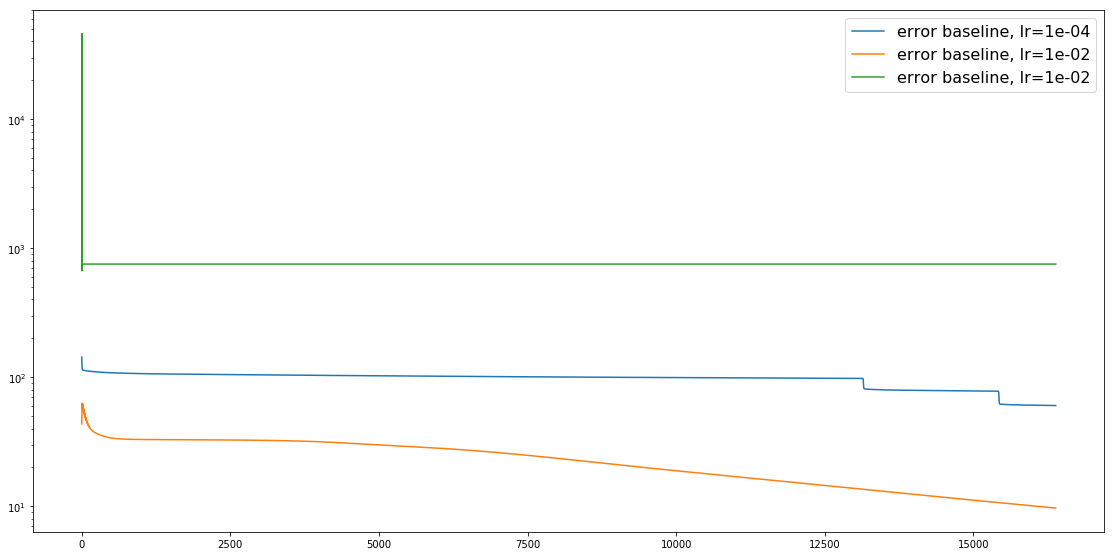

In [19]:
fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

if logy:
    for ii, ee in err.items():
        ax1.semilogy(ee[1][:], label='error baseline, lr=%1.0e'%ee[0])
else:
    for ii, ee in err.items():
        ax1.plot(ee[1][:], label='error baseline, lr=%1.0e'%ee[0])

#ax1.set_xlabel('', fontsize = 16)
#ax1.set_ylabel('', fontsize = 16)
legend = ax1.legend(loc='best', fontsize=16)

plt.show()
plt.close()